In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import numpy as np
%matplotlib widget

In [2]:
# Lukasiewicz Copula
def c_l(X, Y):
    return np.maximum(np.zeros(shape=X.shape), X+Y-1) 

# Minimum Copula
def c_min(X, Y):
    return np.minimum(X, Y)
    
# Product Copula
def c_pi(X, Y):
    return np.multiply(X, Y)

# Joe Copula
def c_joe(X, Y, theta):
    assert theta>=1, "Theta should be superior to 1"
    return 1 - ((1 - X)**theta + (1 - Y)**theta - np.multiply((1 - X)**theta, (1 - Y)**theta))**(1/theta)

# Ali-Mikhail-Haq Copula
def c_amh(X, Y , theta):
    assert -1<=theta<=1, "Theta should be between -1 and 1 (included)"
    return np.multiply(X, Y)/(1 - theta*np.multiply(1 - X, 1 - Y))

# Frank copula
def c_frank(X, Y, theta):
    assert theta != 0, "Theta should be different from zero"
    return -1/theta*np.log(1 + np.multiply(np.exp(-theta*X) - 1, np.exp(-theta*Y) - 1)/(np.exp(-theta) - 1))

In [20]:
# Make data.
X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)

X, Y = np.meshgrid(X, Y)

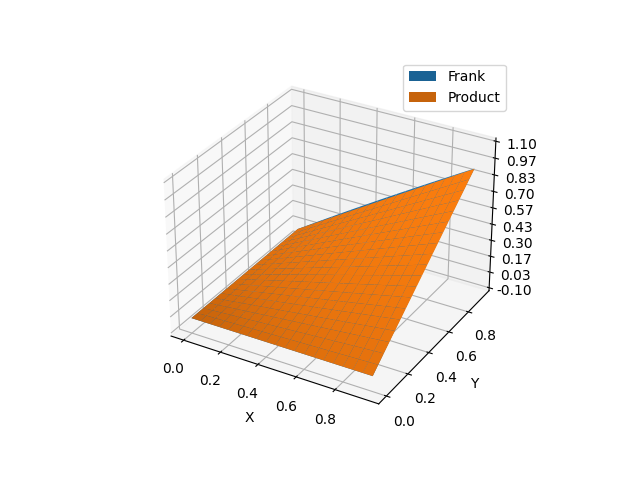

In [34]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.

"""c_l = ax.plot_surface(X, Y, C_L, label="Lukasiewicz")
c_min = ax.plot_surface(X, Y, C_min, label="C_min")
c_pi = ax.plot_surface(X, Y, C_pi, label="Product")"""

c = c_amh(X,Y, 0.9)
c = ax.plot_surface(X, Y, c, label="Frank")

c._facecolors2d = c._facecolor3d
c._edgecolors2d = c._edgecolor3d


c_ = c_pi(X,Y)
c_ = ax.plot_surface(X, Y, c_, label="Product")

c_._facecolors2d = c_._facecolor3d
c_._edgecolors2d = c_._edgecolor3d

# Customize the z axis.
ax.set_zlim(-0.1, 1.1)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.legend()

plt.show()
